# Analyzing Uber Trips

### Setup
For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.

### Installing Required Libraries

In [ ]:
%pip install seaborn
%pip install folium

## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

## Load the dataset

In [2]:
try:
    url = '/kaggle/input/uber-data-analysis/UberDataset.csv'
    df=pd.read_csv(url)
except FileNotFoundError:
    print("The file 'cause_of_deaths.csv' was not found.")
    exit()
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


## Display initial information 

In [3]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
df.tail(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [5]:
df.shape

(1156, 7)

## Data Cleaning & Processing: To clean and organize the dataset, you can use Python libraries such as Pandas and NumPy. Here are some steps you can follow:

### 1- Handle missing values: Use Pandas to identify and handle missing values in the dataset.

In [6]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [8]:
df["PURPOSE"] = df["PURPOSE"].fillna("UnKnown")
df.dropna(inplace = True)

In [9]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [10]:
df.describe()

,MILES
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


In [12]:
df.describe(include = 'all')

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
count,1155,1155,1155,1155,1155,1155.000000,1155
unique,1154,1154,2,177,188,NaN,11
top,6/28/2016 23:34,6/28/2016 23:59,Business,Cary,Cary,NaN,UnKnown
freq,2,2,1078,201,203,NaN,502
mean,NaN,NaN,NaN,NaN,NaN,10.566840,NaN
std,NaN,NaN,NaN,NaN,NaN,21.579106,NaN
min,NaN,NaN,NaN,NaN,NaN,0.500000,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.900000,NaN
50%,NaN,NaN,NaN,NaN,NaN,6.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,10.400000,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     1155 non-null   object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


### check what every column have

In [14]:
for col in df.columns:
    print( col,':', df[col].nunique())
    print(df[col].value_counts().nlargest(5))
    print('\n' + '*' * 20 + '\n')

START_DATE : 1154
START_DATE
6/28/2016 23:34     2
01-01-2016 21:11    1
9/27/2016 21:01     1
9/27/2016 13:21     1
9/27/2016 8:33      1
Name: count, dtype: int64

********************

END_DATE : 1154
END_DATE
6/28/2016 23:59     2
01-01-2016 21:17    1
9/28/2016 2:37      1
9/27/2016 14:43     1
9/27/2016 8:35      1
Name: count, dtype: int64

********************

CATEGORY : 2
CATEGORY
Business    1078
Personal      77
Name: count, dtype: int64

********************

START : 177
START
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Name: count, dtype: int64

********************

STOP : 188
STOP
Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Name: count, dtype: int64

********************

MILES : 256
MILES
9.9     28
3.1     26
2.1     19
10.4    19
3.0     19
Name: count, dtype: int64

********************

PURPOSE : 11
PURPOSE
UnKnown 

### Find And Remove Duplicates

In [15]:
print(df.duplicated().sum())

1


In [17]:
df.drop_duplicates(inplace = True)

In [18]:
print(df.duplicated().sum())

0


In [19]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

### Convert the date column to date format using dateutil parser to_datetime() function may not be able to parse the date format correctly.¶

In [21]:
from dateutil.parser import parse

df["START_DATE"] = df["START_DATE"].apply(lambda x: parse(x))
df["END_DATE"] = df["END_DATE"].apply(lambda x: parse(x))

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1154 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1154 non-null   datetime64[ns]
 1   END_DATE    1154 non-null   datetime64[ns]
 2   CATEGORY    1154 non-null   object        
 3   START       1154 non-null   object        
 4   STOP        1154 non-null   object        
 5   MILES       1154 non-null   float64       
 6   PURPOSE     1154 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.1+ KB


### Get The Duration In Minutes

In [24]:
df['duration in minutes']=(df['END_DATE'] - df['START_DATE']).dt.total_seconds() / 60

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1154 entries, 0 to 1154
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   START_DATE           1154 non-null   datetime64[ns]
 1   END_DATE             1154 non-null   datetime64[ns]
 2   CATEGORY             1154 non-null   object        
 3   START                1154 non-null   object        
 4   STOP                 1154 non-null   object        
 5   MILES                1154 non-null   float64       
 6   PURPOSE              1154 non-null   object        
 7   duration in minutes  1154 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 81.1+ KB


In [26]:
df['duration in minutes']

0         6.0
1        12.0
2        13.0
3        14.0
4        67.0
        ...  
1150      7.0
1151     18.0
1152     35.0
1153     18.0
1154    103.0
Name: duration in minutes, Length: 1154, dtype: float64

### Extract The Start Day

In [28]:
df['start day']=df['START_DATE'].dt.strftime('%A')
df['start day']

0          Friday
1        Saturday
2        Saturday
3         Tuesday
4       Wednesday
          ...    
1150     Saturday
1151     Saturday
1152     Saturday
1153     Saturday
1154     Saturday
Name: start day, Length: 1154, dtype: object

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1154 entries, 0 to 1154
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   START_DATE           1154 non-null   datetime64[ns]
 1   END_DATE             1154 non-null   datetime64[ns]
 2   CATEGORY             1154 non-null   object        
 3   START                1154 non-null   object        
 4   STOP                 1154 non-null   object        
 5   MILES                1154 non-null   float64       
 6   PURPOSE              1154 non-null   object        
 7   duration in minutes  1154 non-null   float64       
 8   start day            1154 non-null   object        
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 90.2+ KB


In [31]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,duration in minutes,start day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UnKnown,12.0,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,Wednesday


## Exploratory Data Analysis(EDA)


### 1. Identify the most frequency purpose.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'UnKnown'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices'),
  Text(7, 0, 'Charity ($)'),
  Text(8, 0, 'Commute'),
  Text(9, 0, 'Moving'),
  Text(10, 0, 'Airport/Travel')])

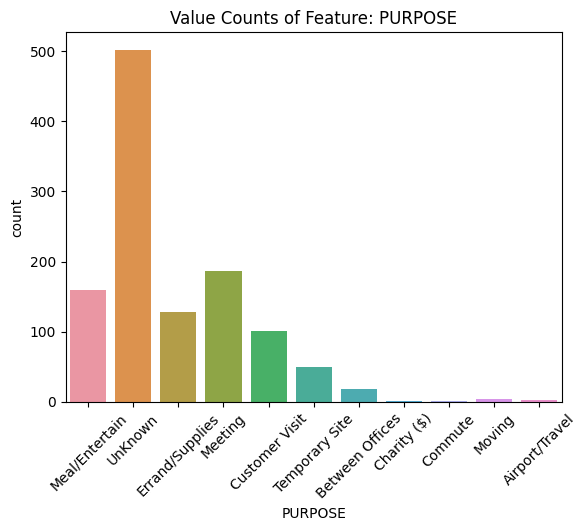

In [35]:
sns.countplot(x=df["PURPOSE"])
plt.title("Value Counts of Feature: PURPOSE")
plt.xticks(rotation=45)

### 2. Identify the most frequency category.

(array([0, 1]), [Text(0, 0, 'Business'), Text(1, 0, 'Personal')])

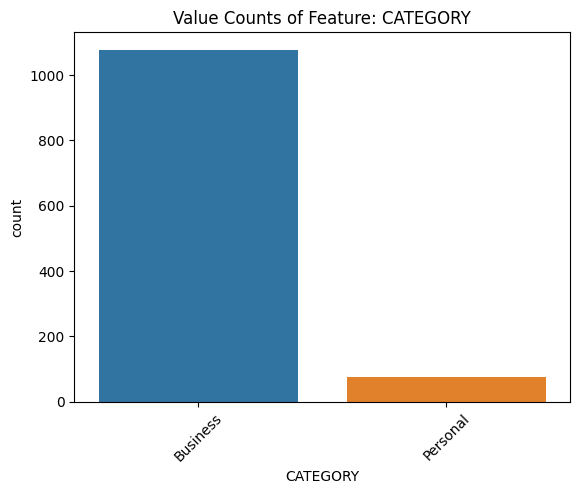

In [36]:
sns.countplot(x=df["CATEGORY"])
plt.title("Value Counts of Feature: CATEGORY")
plt.xticks(rotation=45)

### 3.The relation between the duration and miles

<Figure size 1000x600 with 0 Axes>

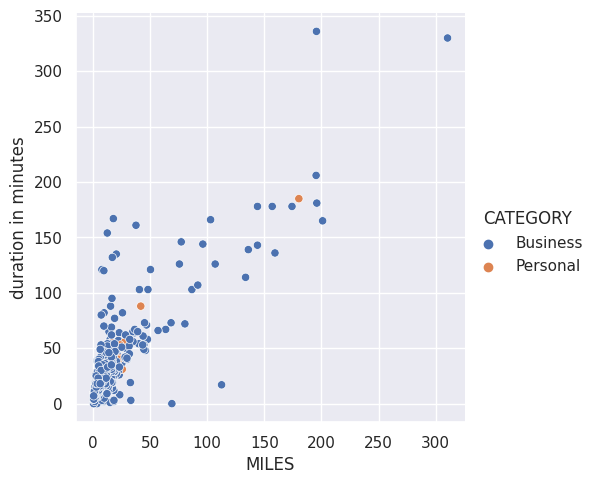

In [38]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.relplot(x=df['MILES'],y=df['duration in minutes'],hue=df['CATEGORY'])

### 4.Which day has the most trips

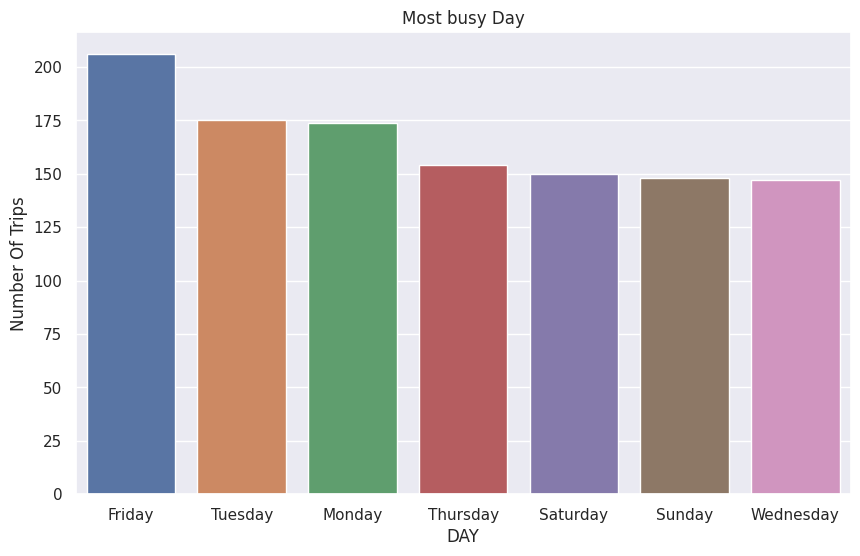

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='start day', data=df, order=df['start day'].value_counts().index)
plt.xlabel('DAY')
plt.ylabel('Number Of Trips')
plt.title('Most busy Day')
plt.show()

### 5. what is the most busy hour

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


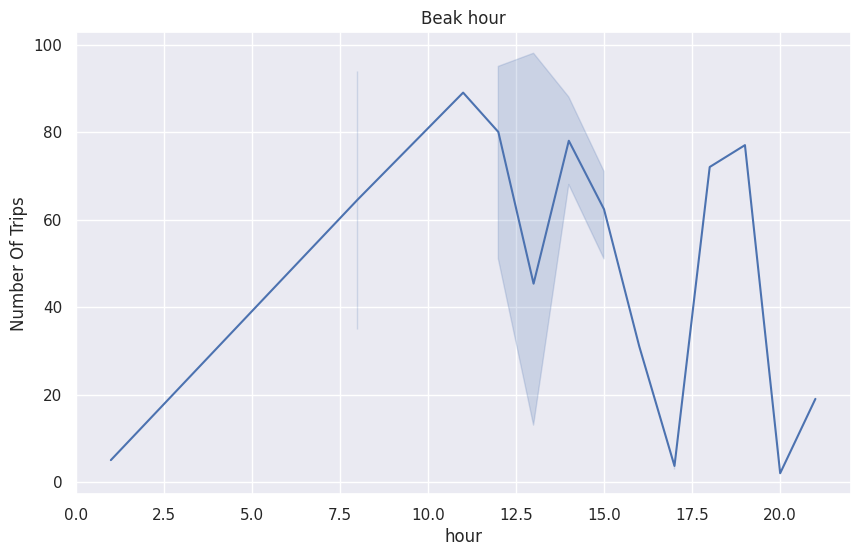

In [44]:
df['hour'] = df['START_DATE'].dt.hour
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y=df['hour'].value_counts(), data=df)
plt.xlabel('hour')
plt.ylabel('Number Of Trips')
plt.title('Beak hour')
plt.show()

### 6.What is the most taken duration

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


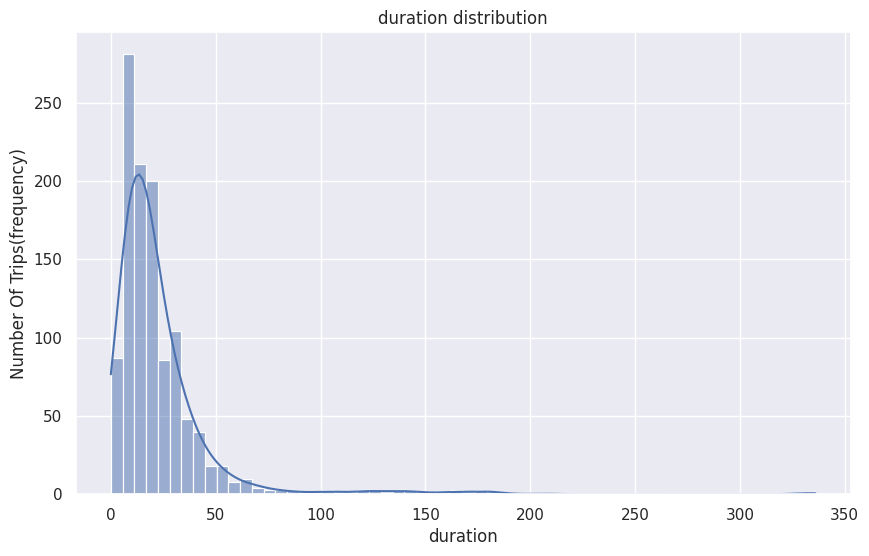

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(df['duration in minutes'], bins=60, kde=True)
plt.xlabel('duration')
plt.ylabel('Number Of Trips(frequency)')
plt.title('duration distribution')
plt.show()

### 7.Purpose vs miles travelled by category 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'UnKnown'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices'),
  Text(7, 0, 'Charity ($)'),
  Text(8, 0, 'Commute'),
  Text(9, 0, 'Moving'),
  Text(10, 0, 'Airport/Travel')])

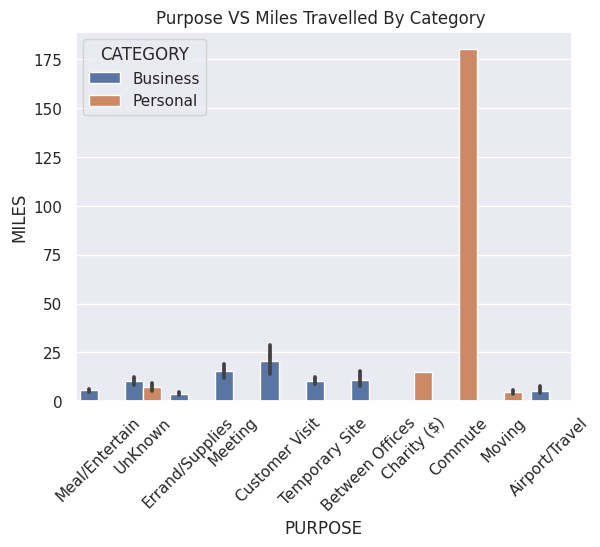

In [46]:
sns.barplot(x= df["PURPOSE"], y= df['MILES'],hue = df["CATEGORY"])
plt.title("Purpose VS Miles Travelled By Category ")
plt.xticks(rotation=45)

## **Thanks....**